<a href="https://colab.research.google.com/github/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/Bootcamp_Mod6_Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=16O9eMrtSeRDnDpZgmneXj34eIClCntvg'>

# ***Data Science*** **Aplicado em Finanças**

---

Esse notebook servirá para o acompanhamento das aulas do Módulo 06 do ***Bootcamp de Data Science Aplicada*** realizado pela Alura.

O Módulo 6 é um módulo extra especialmente desenvolvido para este *Bootcamp* e é voltado para a área financeira, mais especificamente para a área de análise de crédito.

Além do desenvolvimento do modelo de *machine learning* em si, também está no escopo o *deploy* através do *streamlit*.

---

>Agora chegou o momento de consolidar seu conhecimento em uma nova área. Vamos sair do assunto saúde e desenvolver um projeto completo de Data Science aplicado a finanças. Será mais um projeto incrível para complementar seu portfólio e principalmente para te ensinar assuntos específicos desta área tão relevante.
>
>Então prepare os equipamentos porque nosso mergulho será em outros mares!
---

## **Aula 01 - Contextualização do Mercado Financeiro**
---


A aula começou falando dos pilares que temos na cadeia de crédito. São eles:

* Prospecção
* Concessão
* Gestão de Risco
* Recuperação

O modelo que iremos trabalhar estará no pilar **CONCESSÃO**. Vamos trabalhar o modelo de decisão que irá avaliar a concessão ou não do crédito solicitado.

Na sequência fomos informados que a base que iremos usar é uma adaptação de uma base que foi disponibilizada em um desafio do **Kaggle**.

São duas bases de dados, com os clientes cadastrados e com os empréstimos aprovados.

Baixei as bases e fiz *upload* para o meu repositório do **GitHub**.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format
sns.set()

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   ITALIC = '\033[3m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
url_cadastrados = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/dados/clientes_cadastrados.zip?raw=true'
url_aprovados = 'https://github.com/gcochlar/Bootcamp_DataScience/blob/main/Modulo_06/dados/clientes_aprovados.zip?raw=true'

Vamos começar importando a base de clientes cadastrados.

In [3]:
dados_cadastrados = pd.read_csv(url_cadastrados, compression='zip')
dados_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,"427,500.00",Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
1,5008805,H,1,1,0,"427,500.00",Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
2,5008806,H,1,1,0,"112,500.00",Empregado,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Seguranca,2.00,3.10
3,5008808,M,0,1,0,"270,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
4,5008809,M,0,1,0,"270,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40


In [4]:
dados_cadastrados.shape

(438557, 18)

Essa primeira base, de clientes cadastrados, é bem extensa.

Tem quase 440 mil registros com 18 variáveis diferentes.

Imediatamente chama a atenção a coluna **`ID_Cliente`** que deve servir como chave de identificação de cada cliente, mas isso precisa ser confirmado.

Também chama a atenção o fato de termos linhas aparentemente duplicadas (0 e 1 ou 3 e 4, por exemplo).

Vamos importar e olhar também nossa base de empréstimos aprovados.

In [5]:
dados_aprovados = pd.read_csv(url_aprovados, compression='zip')
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [6]:
dados_aprovados.shape

(1048575, 3)

A base de empréstimos aprovados também é bem extensa, com mais de 1 milhão de registros, apesar de contar com apenas 3 variáveis.

Também conta com uma coluna **`ID_Cliente`** mas que já podemos ver que apresenta duplicidades. Deverá servir para conectar as duas bases de dados.

Vamos focar, inicialmente, na análise exploratória da base de clientes cadastrados.

In [7]:
dados_cadastrados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438557 non-null  int64  
 1   Genero                 438557 non-null  object 
 2   Tem_Carro              438557 non-null  int64  
 3   Tem_Casa_Propria       438557 non-null  int64  
 4   Qtd_Filhos             438557 non-null  int64  
 5   Rendimento_Anual       438557 non-null  float64
 6   Categoria_de_renda     438557 non-null  object 
 7   Grau_Escolaridade      438557 non-null  object 
 8   Estado_Civil           438557 non-null  object 
 9   Moradia                438557 non-null  object 
 10  Idade                  438557 non-null  float64
 11  Tem_Celular            438557 non-null  int64  
 12  Tem_telefone_trabalho  438557 non-null  int64  
 13  Tem_telefone_fixo      438557 non-null  int64  
 14  Tem_email              438557 non-nu

Vamos tentar confirmar nossa ideia de que a coluna **`ID_Cliente`** pode ser usada como identificador único de nossos clientes.

In [8]:
dados_cadastrados.ID_Cliente.value_counts()

7603224    2
7742853    2
7836711    2
7091721    2
7022327    2
          ..
5372264    1
6412652    1
6410605    1
6367602    1
6291456    1
Name: ID_Cliente, Length: 438510, dtype: int64

O fato de termos ocorrências duplas de alguns **IDs** indica algum problema em nossa base de dados.

Vamos verificar se temos registros duplicados, ou seja, linhas completamente iguais.

In [9]:
dados_cadastrados.duplicated().sum()

0

Não temos linhas duplicadas, mas a duplicidade de **IDs** irá nos atrapalhar mais adiante.

Precisamos verificar qual o tamanho do nosso problema. Em uma base de quase 440 mil registros, quantos estão duplicados?

In [10]:
dados_cadastrados[dados_cadastrados.ID_Cliente.duplicated(keep=False)].sort_values(by='ID_Cliente')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,"135,000.00",Empregado,Ensino medio,Casado,Casa propria,33.00,1,0,0,1,Construcao Civil,5.00,2.00
425023,7022197,M,0,1,0,"450,000.00",Associado comercial,Ensino superior,Separado,Casa propria,54.00,1,0,0,1,Outros,1.00,4.90
431545,7022327,M,0,1,0,"135,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,40.00,1,0,0,0,Alta tecnologia,1.00,14.50
431911,7022327,H,1,1,0,"256,500.00",Associado comercial,Ensino superior,Casado,Casa propria,59.00,1,0,0,1,Equipe principal,2.00,4.60
425486,7023108,H,1,1,1,"67,500.00",Empregado,Ensino medio,Casado,Casa propria,42.00,1,1,0,0,Equipe principal,3.00,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,"292,500.00",Empregado,Ensino superior,Casado,Casa propria,38.00,1,0,1,0,Contabilidade,4.00,12.00
421464,7836971,H,1,0,1,"157,500.00",Empregado,Ensino medio,Casado,Casa propria,38.00,1,0,0,0,Outros,3.00,15.10
428620,7836971,M,0,1,0,"103,500.00",Empregado,Ensino medio,Uniao estavel,Casa propria,37.00,1,0,1,0,Venda,2.00,7.70
422068,7838075,H,0,1,0,"337,500.00",Associado comercial,Ensino medio,Casado,Casa propria,50.00,1,0,0,1,Motorista,2.00,3.50


Temos 94 registros duplicados. Isso representa em torno de 0,02% de nossa base.

Inicialmente, podemos desprezar esses registros para avançarmos em nossa análise.

In [11]:
id_repetidos = dados_cadastrados[dados_cadastrados.ID_Cliente.duplicated(keep=False)].sort_values(by='ID_Cliente')['ID_Cliente']
id_repetidos

426818    7022197
425023    7022197
431545    7022327
431911    7022327
425486    7023108
           ...   
426563    7836711
421464    7836971
428620    7836971
422068    7838075
423702    7838075
Name: ID_Cliente, Length: 94, dtype: int64

In [12]:
dados_cad_id_unicos = dados_cadastrados.drop(id_repetidos.index)
dados_cad_id_unicos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,"427,500.00",Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
1,5008805,H,1,1,0,"427,500.00",Empregado,Ensino superior,Uniao estavel,Alugado,33.00,1,1,0,0,Outros,2.00,12.40
2,5008806,H,1,1,0,"112,500.00",Empregado,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Seguranca,2.00,3.10
3,5008808,M,0,1,0,"270,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
4,5008809,M,0,1,0,"270,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,52.00,1,0,1,1,Venda,1.00,8.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,H,0,1,0,"135,000.00",Pensionista,Ensino medio,Separado,Casa propria,62.00,1,0,0,0,Outros,1.00,"-1,000.70"
438553,6840222,M,0,0,0,"103,500.00",Empregado,Ensino medio,Solteiro,Casa propria,44.00,1,0,0,0,Construcao Civil,1.00,8.20
438554,6841878,M,0,0,0,"54,000.00",Associado comercial,Ensino superior,Solteiro,Mora com os pais,22.00,1,1,0,0,Venda,1.00,1.00
438555,6842765,M,0,1,0,"72,000.00",Pensionista,Ensino medio,Casado,Casa propria,59.00,1,0,0,0,Outros,2.00,"-1,000.70"


In [13]:
(dados_cad_id_unicos.ID_Cliente.value_counts() > 1).sum()

0

Agora estamos com um novo *dataframe*, sem nenhum **ID** duplicado.

Conforme mencionado antes, nossa base aparentava ter dados em duplicidade também nas demais colunas, ou seja, clientes com vários **IDs** diferentes.

Vamos verificar qual o impacto disso em nosso *dataset*.

In [14]:
dados_cadastrados.drop(['ID_Cliente'], axis=1).duplicated().sum()

353636

Aqui a situação é mais complexa.

Temos mais de 350 mil registros idênticos em nossa base, mais de 80%.

Não podemos desprezar esses dados sem investigar melhor o que pode ter acontecido em nossa base.

Vamos prosseguir com a base que fizemos apenas retirando os **IDs** duplicados e verificar a existência de dados nulos em alguma coluna.

In [15]:
# Verificação de dados nulos na base

dados_cad_id_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

Não temos dados nulos, podemos prosseguir.

In [16]:
dados_cad_id_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

#### **Desafio 1 - Explorar IDs Repetidos (Atualização de Cadastro? Erro?)**
---



Primeiro vamos gerar um *dataframe* só com os 94 clientes que foram desconsiderados da nossa base acima.

In [17]:
dados_cad_id_repetidos = dados_cadastrados[dados_cadastrados.ID_Cliente.isin(id_repetidos)].sort_values(by='ID_Cliente')
dados_cad_id_repetidos

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,"135,000.00",Empregado,Ensino medio,Casado,Casa propria,33.00,1,0,0,1,Construcao Civil,5.00,2.00
425023,7022197,M,0,1,0,"450,000.00",Associado comercial,Ensino superior,Separado,Casa propria,54.00,1,0,0,1,Outros,1.00,4.90
431545,7022327,M,0,1,0,"135,000.00",Associado comercial,Ensino medio,Solteiro,Casa propria,40.00,1,0,0,0,Alta tecnologia,1.00,14.50
431911,7022327,H,1,1,0,"256,500.00",Associado comercial,Ensino superior,Casado,Casa propria,59.00,1,0,0,1,Equipe principal,2.00,4.60
425486,7023108,H,1,1,1,"67,500.00",Empregado,Ensino medio,Casado,Casa propria,42.00,1,1,0,0,Equipe principal,3.00,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426563,7836711,M,0,1,2,"292,500.00",Empregado,Ensino superior,Casado,Casa propria,38.00,1,0,1,0,Contabilidade,4.00,12.00
421464,7836971,H,1,0,1,"157,500.00",Empregado,Ensino medio,Casado,Casa propria,38.00,1,0,0,0,Outros,3.00,15.10
428620,7836971,M,0,1,0,"103,500.00",Empregado,Ensino medio,Uniao estavel,Casa propria,37.00,1,0,1,0,Venda,2.00,7.70
422068,7838075,H,0,1,0,"337,500.00",Associado comercial,Ensino medio,Casado,Casa propria,50.00,1,0,0,1,Motorista,2.00,3.50


In [18]:
dados_cad_id_repetidos.drop('ID_Cliente', axis=1).duplicated().sum()

0

Desprezando o **```ID_Cliente```** desses 94 registros com **ID** duplicado, podemos ver que não temos nenhuma duplicidade do restante dos dados.

Isso indica que temos algum tipo de erro na atribuição desses **IDs**, permitindo que não seja uma chave única em nossa base.

É necessário verificar se foi um erro na extração ou se o erro também está presente no sistema de foram extraídos os dados.

#### **Desafio 2 - Explorar as Colunas (*features*) e Identificar se são Contínuas, Categóricas, Binárias**
---



In [19]:
cols_int64 = dados_cad_id_unicos.select_dtypes('int64').columns
cols_float64 = dados_cad_id_unicos.select_dtypes('float64').columns
cols_object = var_float64 = dados_cad_id_unicos.select_dtypes('object').columns

In [20]:
for var in cols_int64:
    print(var,'- Valores Únicos:', str(np.sort(dados_cad_id_unicos[var].unique())))

ID_Cliente - Valores Únicos: [5008804 5008805 5008806 ... 7999738 7999784 7999952]
Tem_Carro - Valores Únicos: [0 1]
Tem_Casa_Propria - Valores Únicos: [0 1]
Qtd_Filhos - Valores Únicos: [ 0  1  2  3  4  5  6  7  9 12 14 19]
Tem_Celular - Valores Únicos: [1]
Tem_telefone_trabalho - Valores Únicos: [0 1]
Tem_telefone_fixo - Valores Únicos: [0 1]
Tem_email - Valores Únicos: [0 1]


In [21]:
dados_cad_id_unicos[dados_cad_id_unicos.Qtd_Filhos.isin([12,14,19])].shape[0]

8

As colunas que estão com o tipo **`int64`** são, em sua maioria, binárias.

As exceções são:
* **ID_Cliente:** que já vimos que é o identificador de cliente
* **Qtd_Filhos:** que varia de 0 à 19 (e esses números excessivamente altos podem indicar erros de preenchimento, mas temos 8 clientes com 12 ou mais filhos)
* **Tem_Celular:** que é igual a 1 para todos, podendo ser desconsiderada

In [22]:
for var in cols_float64:
    print(var,'- Range:', str(dados_cad_id_unicos[var].min()), 'à', str(dados_cad_id_unicos[var].max()))
    print('          - Média e Desvio Padrão:', str(dados_cad_id_unicos[var].mean()), 'e', str(dados_cad_id_unicos[var].std()))

Rendimento_Anual - Range: 26100.0 à 6750000.0
          - Média e Desvio Padrão: 187522.009381567 e 110083.15376904178
Idade - Range: 21.0 à 69.0
          - Média e Desvio Padrão: 43.83403160585956 e 11.472814834775818
Tamanho_Familia - Range: 1.0 à 20.0
          - Média e Desvio Padrão: 2.1944611061822776 e 0.8971944827602194
Anos_empregado - Range: -1000.7 à 48.0
          - Média e Desvio Padrão: -165.9360358800694 e 380.20113080357845


In [23]:
dados_cad_id_unicos[dados_cad_id_unicos.Anos_empregado == dados_cad_id_unicos.Anos_empregado.min()].shape

(75314, 18)

In [24]:
dados_cad_id_unicos[dados_cad_id_unicos.Anos_empregado < 0].shape

(75314, 18)

As colunas com o tipo **`float64`** parecem estar classificadas corretamente, mas a variável **`Anos_empregado`** está com um erro de preenchimento, onde temos 75.314 registros com o valor de -1000,7, chegando a distorcer a média geral do *dataset*.

Chama a atenção também que temos um *range* muito grande na variável **`Rendimento_Anual`**, variando de R\$ 26 mil à R\$ 6,75 milhões. Precisamos avaliar a existência de *outliers*.

Isso precisa ser tratado antes de prosseguirmos.

In [25]:
for var in cols_object:
    print(var,'- Valores:', str(np.sort(dados_cad_id_unicos[var].unique())))

Genero - Valores: ['H' 'M']
Categoria_de_renda - Valores: ['Associado comercial' 'Empregado' 'Estudante' 'Pensionista'
 'Servidor publico']
Grau_Escolaridade - Valores: ['Ensino fundamental' 'Ensino medio' 'Ensino superior'
 'Ensino superior incompleto' 'Pos graduacao']
Estado_Civil - Valores: ['Casado' 'Separado' 'Solteiro' 'Uniao estavel' 'Viuvo']
Moradia - Valores: ['Alugado' 'Apartamento comercial' 'Casa propria'
 'Cooperativa habitacional' 'Habitacao publica' 'Mora com os pais']
Ocupacao - Valores: ['Alta tecnologia' 'Baixa qualificacao' 'Construcao Civil' 'Contabilidade'
 'Corretor imobiliario' 'Cozinha' 'Equipe principal' 'Garcom' 'Gerencia'
 'Limpeza' 'Medicina' 'Motorista' 'Outros' 'RH' 'Secretariado' 'Seguranca'
 'Servico privado' 'TI' 'Venda']


Entre as colunas com o tipo **`object`** temos apenas um ajuste que poderia ser feito, já pensando na futura utilização de *Machine Learning*, que é transformar a variável **`Genero`** em numérica binária.

#### **O que aprendemos nessa aula?**
---

>* **Mercado financeiro:**
>
>  * Pilares da cadeia de crédito;
>  * Fluxo de um pedido de crédito.
>
>* **Base de dados:**
>
>  * Exploração da base de clientes cadastrados e suas *features*;
>  * Verificação de dados duplicados e tratamento;
>  * Verificação de dados nulos.
---


## **Aula 02 - Analisando a Base de Cadastro de Clientes**
---


### **Vídeo 1 - Variáveis Contínuas / Quantitativas**

>Falamos no vídeo sobre dois tipos de variáveis, sendo elas as **categóricas** e as **contínuas**.
>
>As **variáveis contínuas** são variáveis quantitativas, que representam uma mensuração. Variáveis contínuas assumem valores em uma escala contínua (números reais), ou seja, são variáveis numéricas que podem assumir um número infinito de valores dentro de um intervalo.
>
>No nosso caso, as variáveis que no vídeo chamamos de contínuas são na verdade variáveis quantitativas já que contém tanto as variáveis discretas quanto as contínuas.
>
>Ao ver o vídeo, lembre-se dessas informações. Elas são muito importantes.
---

Vamos começar separando as colunas que contém variáveis quantitativas.

In [26]:
cols_quantitativas = ['Idade', 'Qtd_Filhos', 'Anos_empregado', 'Tamanho_Familia', 'Rendimento_Anual']

In [27]:
dados_cad_id_unicos[cols_quantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,"438,463.00",43.83,11.47,21.00,34.00,43.00,53.00,69.00
Qtd_Filhos,"438,463.00",0.43,0.72,0.00,0.00,0.00,1.00,19.00
Anos_empregado,"438,463.00",-165.94,380.20,"-1,000.70",1.00,4.00,8.50,48.00
Tamanho_Familia,"438,463.00",2.19,0.90,1.00,2.00,2.00,3.00,20.00
Rendimento_Anual,"438,463.00","187,522.01","110,083.15","26,100.00","121,500.00","161,100.00","225,000.00","6,750,000.00"


Conforme já tinha identificado no desafio da aula anterior, temos um possível problema na variável **`Anos_empregado`**, onde temos diversas linhas com valor negativo.

Vamos verificar qual a **`Categoria_de_renda`** dos clientes que estão com essa variável zerada ou negativa.

In [28]:
dados_cad_id_unicos.query('Anos_empregado <= 0')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1,000.70       Pensionista            75314
0.00            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

Como podemos observar, todos os clientes que constam como **Pensionista** na variável **`Categoria_de_renda`** estão com o mesmo valor (1000.7) negativo na variável **`Anos_empregado`**.

Diferente da situação em que tínhamos alguns (poucos) **IDs** duplicados, agora temos uma grande quantidade de clientes com esse valor distorcido. Além disso, pertencem à categoria de **Pensionistas**, que normalmente é de interesse de empresas de crédito.

Mas não podemos deixar os dados assim, até porque estão gerando uma distorção grande nas informações de tempo de emprego. Por isso, vamos alterar os valores para -1. Assim, não perdemos a informação mas vamos atenuar a distorção.

In [29]:
dados_cad_id_unicos.query('Categoria_de_renda == "Pensionista"')[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda
-1,000.70       Pensionista           75314
4.50            Pensionista               5
8.60            Pensionista               5
3.00            Pensionista               5
0.80            Pensionista               4
                                      ...  
9.20            Pensionista               1
9.50            Pensionista               1
10.10           Pensionista               1
10.40           Pensionista               1
7.20            Pensionista               1
Length: 98, dtype: int64

Não podemos fazer a alteração para todos os pensionistas, pois temos alguns com outros tempos de emprego. Vamos fazer a alteração especificamente daqueles que tem o valor de -1000,7.

In [30]:
dados_cad_id_unicos['Anos_empregado'] = dados_cad_id_unicos['Anos_empregado'].replace(-1000.7, -1)

In [31]:
dados_cad_id_unicos[cols_quantitativas].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,"438,463.00",43.83,11.47,21.00,34.00,43.00,53.00,69.00
Qtd_Filhos,"438,463.00",0.43,0.72,0.00,0.00,0.00,1.00,19.00
Anos_empregado,"438,463.00",5.78,6.73,-1.00,1.00,4.00,8.50,48.00
Tamanho_Familia,"438,463.00",2.19,0.90,1.00,2.00,2.00,3.00,20.00
Rendimento_Anual,"438,463.00","187,522.01","110,083.15","26,100.00","121,500.00","161,100.00","225,000.00","6,750,000.00"


### **Vídeo 2 -** ***Outliers***

Vamos analisar maneiras de tratar *outliers*.

Podemos utilizar *boxplots* para identificar os *outliers* de nossos dados, mas vamos começar usando um histograma para verificar os dados de renda anual.

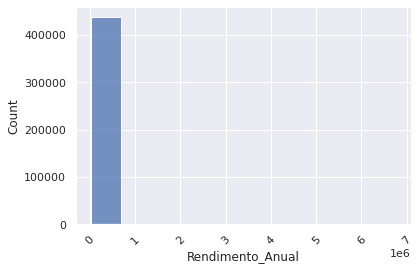

In [32]:
sns.histplot(data=dados_cad_id_unicos, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Os *outliers* (para cima) distorcem nossa informação de tal maneira que o restante dos dados ficam concentrados em uma barra única.

Vamos verificar como fica o *boxplot* dessa mesma variável.

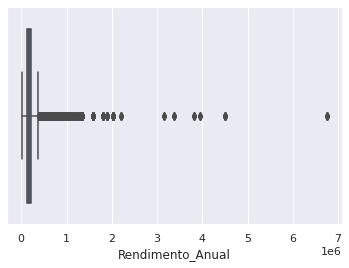

In [33]:
sns.boxplot(x=dados_cad_id_unicos.Rendimento_Anual)

Claramente precisamos tratar esses *outliers* para não penalizar o nosso futuro modelo de decisão. Se trabalhamos com dados com muitos *outliers* vamos tender a ter *overfit*, ou seja, um modelo que vai funcionar muito bem no treino mas terá uma performance fraca em produção.

Vamos estabelecer o limite para separar os *outliers* como sendo a média e dois desvios-padrão para cada lado.

In [34]:
renda = dados_cad_id_unicos.Rendimento_Anual
renda_med = renda.mean()
renda_std = renda.std()

renda_lim_sup = renda_med + 2 * renda_std
renda_lim_inf = renda_med - 2 * renda_std

renda_outliers = []

for index, valor in renda.items():
    if valor > renda_lim_sup or valor < renda_lim_inf:
        renda_outliers.append(index)

len(renda_outliers)

12641

In [35]:
dados_cad_sem_outliers = dados_cad_id_unicos.drop(renda_outliers)
dados_cad_sem_outliers.shape

(425822, 18)

In [36]:
# Maneira Alternativa
# Já gera os dataframes separados sem outliers e só de outliers

df_renda_outliers = dados_cad_id_unicos.query('Rendimento_Anual > @renda_lim_sup or Rendimento_Anual < @renda_lim_inf')
print(df_renda_outliers.shape)

df_renda_sem_outliers = dados_cad_id_unicos.query('Rendimento_Anual <= @renda_lim_sup and Rendimento_Anual >= @renda_lim_inf')
print(df_renda_sem_outliers.shape)

(12641, 18)
(425822, 18)


In [37]:
dados_cad_sem_outliers[cols_quantitativas].describe()

,Idade,Qtd_Filhos,Anos_empregado,Tamanho_Familia,Rendimento_Anual
count,"425,822.00","425,822.00","425,822.00","425,822.00","425,822.00"
mean,43.84,0.43,5.74,2.19,"176,384.73"
std,11.53,0.72,6.74,0.90,"75,033.53"
min,21.00,0.00,-1.00,1.00,"26,100.00"
25%,34.00,0.00,1.00,2.00,"117,000.00"
50%,43.00,0.00,4.00,2.00,"157,500.00"
75%,53.00,1.00,8.50,3.00,"225,000.00"
max,69.00,19.00,48.00,20.00,"405,000.00"


Rodando agora o **`describe`** de nosso *dataset* podemos observar que as informações de rendimento anual não estão mais em notação científica, já estão sendo apresentados como números com formatação normal.

Vamos verificar como fica o histograma desses dados.

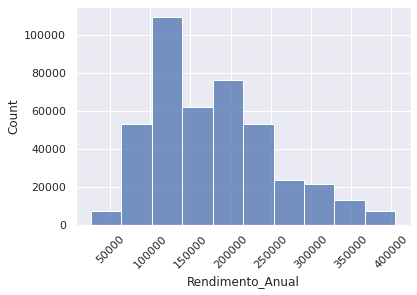

In [38]:
sns.histplot(data=dados_cad_sem_outliers, x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45)
plt.show()

Temos agora uma melhor distribuição dos clientes nas 10 barras do histograma, com uma certa concentração mais à esquerda do gráfico. Isso já é esperado, pois normalmente temos mais pessoas ganhando menos e poucas pessoas com maiores rendimentos.

Vamos analisar da mesma forma a idade dos nossos clientes.

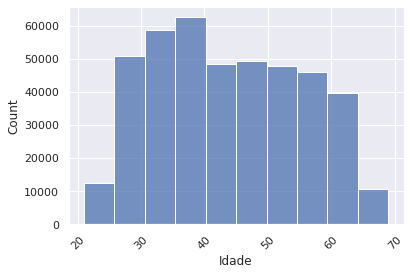

In [39]:
sns.histplot(data=dados_cad_sem_outliers, x='Idade', bins=10)
plt.xticks(rotation=45)
plt.show()

Podemos perceber uma distribuição regular das idades dos clientes, sem concentrações significativas em nenhuma faixa etária específica. Temos apenas um pouco mais de clientes entre os 30 e 40 anos, mas isso está de acordo com a pirâmide populacional.

Vamos analisar o tempo de empresa, mas para isso vamos desconsiderar aqueles clientes pensionistas que deixamos com o valor de -1.

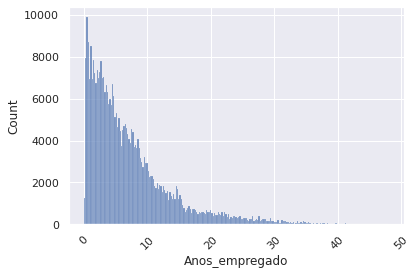

In [40]:
sns.histplot(data=dados_cad_sem_outliers.query('Anos_empregado >=0'), x='Anos_empregado')
plt.xticks(rotation=45)
plt.show()

Podemos observar que a grande maioria dos clientes está na faixa de 0 - 10 anos de empresa.

#### **Desafio 3 - Explorar Outras Técnicas de Identificar e Tratar** ***Outliers***
---

> z-score
> 


Uma das maneiras de se identificar *outliers* é usando o **`zscore`**, presente na biblioteca **`scipy.stats`**.

O [**`zscore`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html) nos retorna quantos desvios-padrão o nosso dado está da média de valores do nosso conjunto de dados. Para obter o mesmo efeito que tivemos acima, deveríamos desprezar todos os dados que tivessem valor absoluto acima de 2.

In [41]:
from scipy import stats
stats.zscore(dados_cad_id_unicos.Rendimento_Anual)

array([ 2.17997265,  2.17997265, -0.68150387, ..., -1.21292093,
       -1.04940799, -0.59974739])

In [42]:
dados_desafio_3 = dados_cad_id_unicos.copy()
dados_desafio_3['zscore_renda'] = abs(stats.zscore(dados_cad_id_unicos.Rendimento_Anual))
dados_desafio_3_sem_outliers = dados_desafio_3[dados_desafio_3.zscore_renda <= 2].drop('zscore_renda', axis=1)
dados_desafio_3_sem_outliers.shape

(425822, 18)

Como pode ser visto pelas dimensões do *dataset* resultante, o resultado foi o mesmo do obtido anteriormente, durante a aula.

Encontrei também algumas funções para tratamento de *outliers* que copiei abaixo.

Essa primeira deve ser executada para cada coluna que desejamos limpar de nosso *dataframe*. Ela considera como limites para tratar um dado como *outlier* os extremos de um *boxplot* e exclui da base todas as linhas que contiverem *outliers*.

In [43]:
# https://www.ti-enxame.com/pt/python/detectar-e-excluir-outliers-no-dataframe-do-pandas/1046331960/
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
# Deve ser executada para cada coluna que desejamos limpar
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Essa segunda função é executada uma única vez para todo o *dataframe*. A diferença aqui é no tratamento dado. Caso ela encontre algum *outlier*, a função substitui o valor pela mediana daquela coluna.

In [44]:
# https://www.ti-enxame.com/pt/python/detectar-e-excluir-outliers-no-dataframe-do-pandas/1046331960/
#------------------------------------------------------------------------------
# Outlier Treatment
# Substitui os dados outliers pela mediana
# Executa para todas as colunas do dataframe
#------------------------------------------------------------------------------
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

Por último, [aqui](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba) temos um artigo interessante sobre o assunto.

### **Vídeo 3 - Variáveis Categóricas**

Vamos agora analisar as variáveis categóricas de nosso *dataset*.

In [45]:
cols_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria', 'Tem_email',
                    'Estado_Civil', 'Tem_Celular','Tem_telefone_trabalho',
                    'Tem_telefone_fixo','Categoria_de_renda', 'Ocupacao',
                    'Grau_Escolaridade','Moradia']

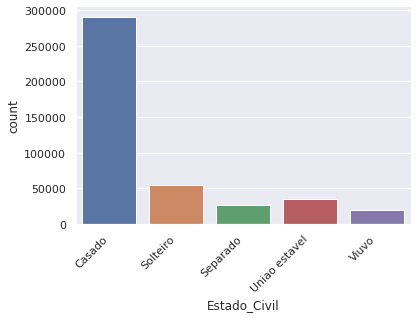

In [46]:
sns.countplot(x = 'Estado_Civil', data=dados_cad_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

Temos uma forte predominância de **Casados**, mas ainda temos uma certa participação dos demais tipos de estado civil em nossa base.

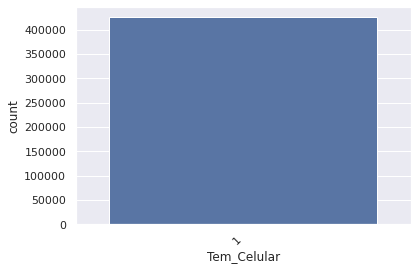

In [47]:
sns.countplot(x = 'Tem_Celular', data=dados_cad_sem_outliers)
plt.xticks(rotation=45, ha='right')
plt.show()

Como já tínhamos visto no desafio da aula anterior, 100% de nossos clientes declararam ter celular, tornando essa variável irrelevante para o nosso modelo.

Assim, ela pode ser descartada e simplificar o treinamento do modelo mais adiante.

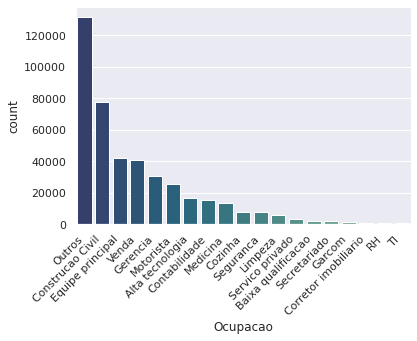

In [48]:
sns.countplot(x = 'Ocupacao', data=dados_cad_sem_outliers,
              order=dados_cad_sem_outliers['Ocupacao'].value_counts().index,
              palette = 'crest_r')
plt.xticks(rotation=45, ha='right')
plt.show()

Muitos clientes declararam a ocupação como **Outros**, isso chama a atenção.

Para analisar esse grupo, podemos verificar como eles se comportam em relação à renda anual.

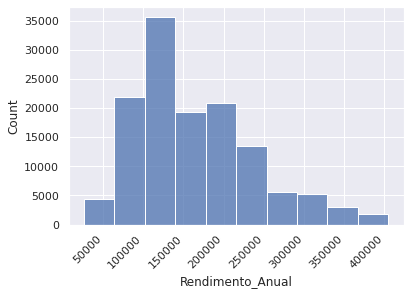

In [49]:
sns.histplot(data=dados_cad_sem_outliers.query('Ocupacao == "Outros"'), x='Rendimento_Anual', bins=10)
plt.xticks(rotation=45, ha='right')
plt.show()

 A distribuição da renda é muito semelhante à que obtivemos quando analisamos o *dataset* inteiro, apenas em uma escala de quantidades diferentes. Isso nos indica que não há uma concentração em alguma categoria que foi esquecida de relacionar nas opções de ocupação de nossa base de dados.

 Tenho uma suspeita de que a maior parte desses outros devem ser os pensionistas que já vimos anteriormente, vamos confirmar.

In [50]:
dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts()

Pensionista            74479
Empregado              35178
Associado comercial    15762
Servidor publico        5971
Estudante                  5
Name: Categoria_de_renda, dtype: int64

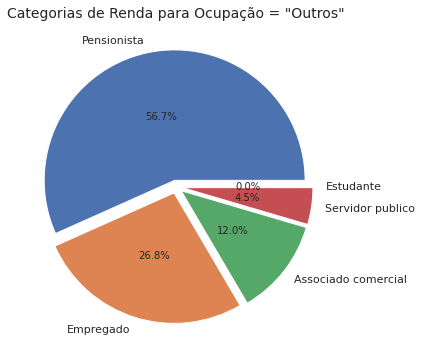

In [51]:
pie, ax = plt.subplots(figsize=[10,6])
labels = dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts().keys()
plt.pie(x=dados_cad_sem_outliers.query('Ocupacao == "Outros"')['Categoria_de_renda'].value_counts(), autopct="%.1f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title('Categorias de Renda para Ocupação = "Outros"', fontsize=14);

In [52]:
dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts()

Outros                74479
Construcao Civil         31
Equipe principal         31
Gerencia                 15
Motorista                11
Medicina                 10
Venda                     8
Alta tecnologia           6
Cozinha                   5
Contabilidade             5
Secretariado              2
Seguranca                 2
Baixa qualificacao        1
Name: Ocupacao, dtype: int64

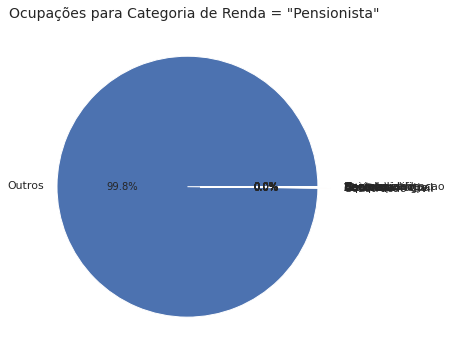

In [53]:
pie, ax = plt.subplots(figsize=[10,6])
labels = dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts().keys()
plt.pie(x=dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts(),
        autopct="%.1f%%", explode=[0.05]*len(dados_cad_sem_outliers.query('Categoria_de_renda == "Pensionista"')['Ocupacao'].value_counts()),
        labels=labels, pctdistance=0.5)
plt.title('Ocupações para Categoria de Renda = "Pensionista"', fontsize=14);

Como podemos ver acima, mais da metade dos **Outros** são **Pensionistas**. E praticamente todos os **Pensionistas** estão classificados como **Outros**, confirmando parcialmente minha hipótese.

---
Nesse momento a Karol fez uma explanação a respeito da regulamentação que o Banco Central (BaCen) impõe sobre os modelos de *credit score*.

Dentro dessa regulamentação o BaCen determina algumas informações que não podem ser consideradas, as chamadas **Informações Sensíveis**. São elas:
* Origem Social e Étnica
* Condições de Saúde
* Informação Genética
* Orientação Sexual
* Convicções Políticas, Religiosas e Filosóficas
---

Em função disso, além da coluna **`Tem_Celular`** que já havíamos decidido eliminar por não influenciar nosso modelo, por uma exigência legal também precisamos eliminar a coluna **`Genero`**.

In [54]:
dados_cad_tratamento1 = dados_cad_sem_outliers.drop(['Genero', 'Tem_Celular'], axis=1)
dados_cad_tratamento1.shape

(425822, 16)

In [55]:
cols_categoricas.remove('Genero')
cols_categoricas.remove('Tem_Celular')
cols_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Tem_email',
 'Estado_Civil',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Categoria_de_renda',
 'Ocupacao',
 'Grau_Escolaridade',
 'Moradia']

#### **Desafio 4 - Criar uma Função para Gerar os Gráficos**
---


In [56]:
def graf_quants(dados, lista):
    linhas = round((len(lista)+ 0.45) / 2 )
    fig, ax = plt.subplots(nrows=linhas, ncols=2, figsize=(12,8))
    fig.suptitle('Variáveis Quantitativas', fontsize=20, fontweight='bold')
    loc_graf_x = 0
    loc_graf_y = 0
    for var in lista:
        ax[loc_graf_x, loc_graf_y] = sns.boxplot(x=dados[var], ax=ax[loc_graf_x, loc_graf_y])
        ax[loc_graf_x, loc_graf_y].set_title(var, fontsize=16, fontweight='bold')
        ax[loc_graf_x, loc_graf_y].set_xlabel('')

        plt.draw()
        xlabels = ax[loc_graf_x, loc_graf_y].get_xticklabels()
        ax[loc_graf_x, loc_graf_y].set_xticklabels(xlabels, rotation=45, ha='right')
        
        # Alternativa para rotacionar os ticks, mas não consegue alinhar
        # Também pode alterar outros parâmetros
        #ax[loc_graf_x, loc_graf_y].tick_params(direction='out', length=6, width=2, colors='r',
        #       grid_color='r', grid_alpha=0.5)
        #ax[loc_graf_x, loc_graf_y].tick_params(labelrotation=45)

        # Outra alternativa para rotacionar os ticks
        # Deve ter pior performance por ter que fazer um a um
        #for tick in ax[loc_graf_x, loc_graf_y].get_xticklabels():
        #    tick.set_rotation(45)
        #    tick.set_ha('right')

        if loc_graf_y == 0:
            loc_graf_y = 1
        else:
            loc_graf_y = 0
            loc_graf_x += 1
    plt.subplots_adjust(wspace=0.2,
                        hspace=0.65)

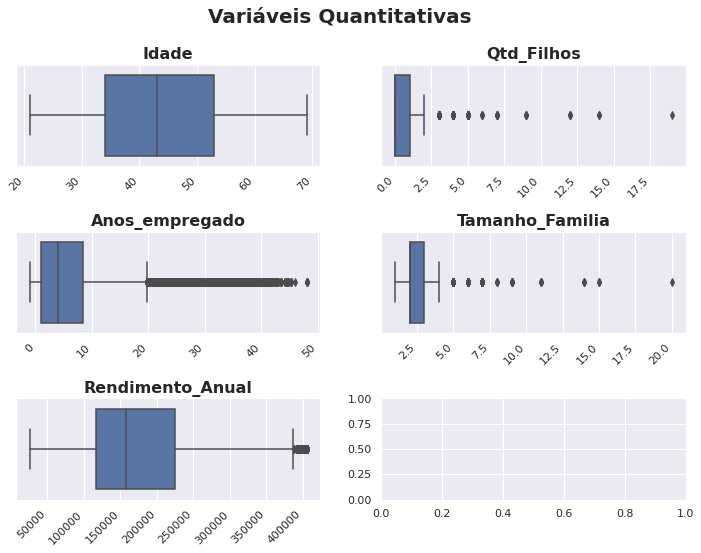

In [57]:
graf_quants(dados_cad_sem_outliers, cols_quantitativas)

In [58]:
def graf_categs(dados, lista):
    #linhas = round((len(lista)+ 0.5) / 3 )
    linhas = round((len(lista)+ 0.45) / 4 )
    #fig, ax = plt.subplots(nrows=linhas, ncols=3, figsize=(21,10))
    fig, ax = plt.subplots(nrows=linhas, ncols=4, figsize=(21,10))
    fig.suptitle('Variáveis Categóricas', fontsize=20, fontweight='bold')
    loc_graf_x = 0
    loc_graf_y = 0
    for var in lista:
        ax[loc_graf_x, loc_graf_y] = sns.countplot(x=dados[var], ax=ax[loc_graf_x, loc_graf_y],
                                                   order=dados[var].value_counts().index,
                                                   palette='crest_r')
        ax[loc_graf_x, loc_graf_y].set_title(var, fontsize=16, fontweight='bold')
        ax[loc_graf_x, loc_graf_y].set_xlabel('')

        plt.draw()
        xlabels = ax[loc_graf_x, loc_graf_y].get_xticklabels()
        ax[loc_graf_x, loc_graf_y].set_xticklabels(xlabels, rotation=45, ha='right', fontsize=10)
        
        if loc_graf_y != 3:
            loc_graf_y += 1
        else:
            loc_graf_y = 0
            loc_graf_x += 1

    plt.subplots_adjust(wspace=0.3,
                        hspace=1.)

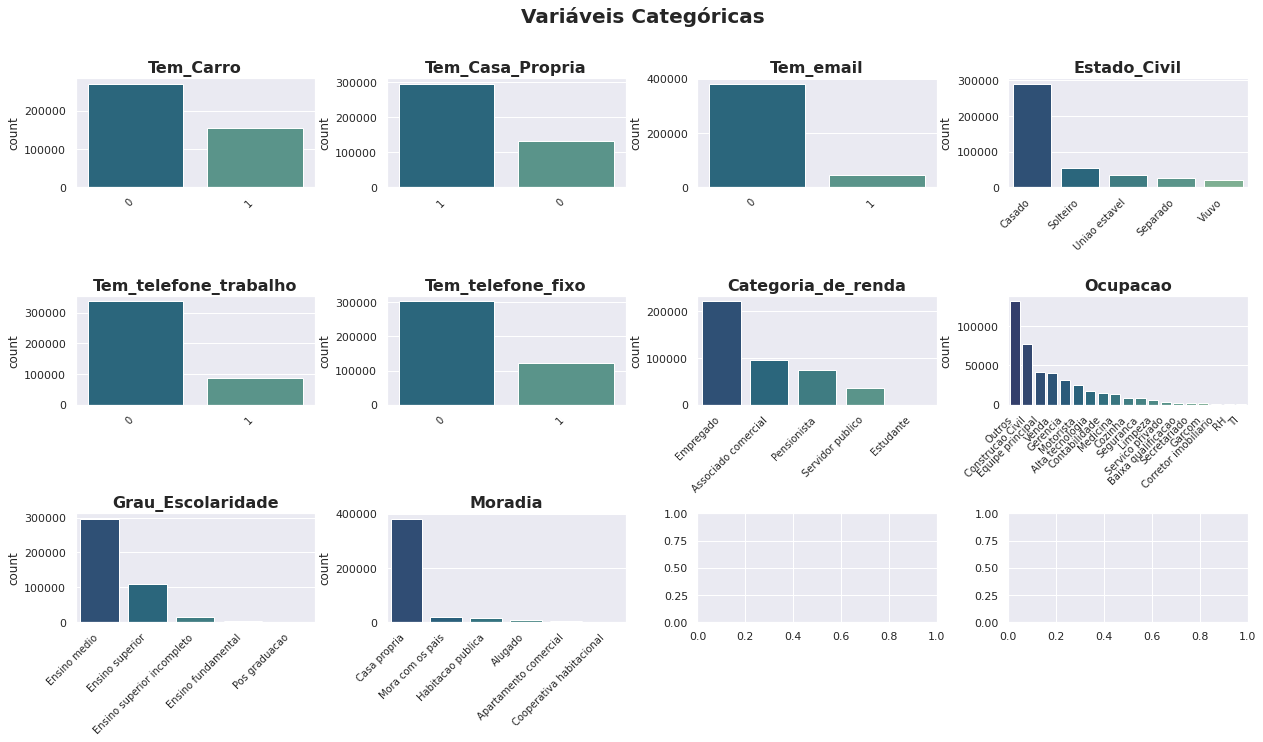

In [59]:
graf_categs(dados_cad_sem_outliers, cols_categoricas)

#### **Desafio 5 - Continuar a Análise Exploratória**
---

Complementei a análise exploratória ao longo do *notebook*, para ficar mais fácil de pegar o contexto.

In [60]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'--- Rendimento Médio por Ocupação e Escolaridade ---'+color.END)

dados_cad_sem_outliers.pivot_table(values='Rendimento_Anual', index=['Ocupacao'],
               columns=['Grau_Escolaridade'], aggfunc=lambda x: round(x.mean()),
               fill_value=0, margins='All', margins_name='TOTAL').astype(float)

--- Rendimento Médio por Ocupação e Escolaridade ---


Grau_Escolaridade,Ensino fundamental,Ensino medio,Ensino superior,Ensino superior incompleto,Pos graduacao,TOTAL
Ocupacao,,,,,,
Alta tecnologia,"190,446.00","173,075.00","202,409.00","199,563.00",0.00,"185,909.00"
Baixa qualificacao,"130,623.00","149,050.00","184,100.00","131,344.00",0.00,"149,633.00"
Construcao Civil,"173,317.00","172,738.00","192,990.00","187,695.00","220,109.00","175,829.00"
Contabilidade,"169,296.00","181,211.00","206,130.00","200,204.00","236,250.00","197,032.00"
Corretor imobiliario,0.00,"219,106.00","222,983.00","190,000.00",0.00,"218,561.00"
Cozinha,"130,271.00","152,875.00","175,514.00","165,125.00",0.00,"154,713.00"
Equipe principal,"167,042.00","167,711.00","191,913.00","179,923.00","232,816.00","180,334.00"
Garcom,"156,150.00","150,481.00","173,543.00","165,205.00",0.00,"154,328.00"
Gerencia,"200,212.00","215,691.00","244,182.00","236,969.00","198,519.00","231,583.00"


É interessante observar a variação do rendimento médio de acordo com o aumento do grau de escolaridade.

Apesar de, em média, termos o crescimento do rendimento com o aumento do grau de escolaridade, isso não é a regra para todas as ocupações, como podemos ver em ***TI*** e ***Alta Tecnologia***, por exemplo.

In [61]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'--- Rendimento Médio por Ocupação e Categoria de Renda ---'+color.END)

dados_cad_sem_outliers.pivot_table(values='Rendimento_Anual', index=['Ocupacao'],
               columns=['Categoria_de_renda'], aggfunc=lambda x: round(x.mean()),
               fill_value=0, margins='All').astype(float)

--- Rendimento Médio por Ocupação e Categoria de Renda ---


Categoria_de_renda,Associado comercial,Empregado,Estudante,Pensionista,Servidor publico,All
Ocupacao,,,,,,
Alta tecnologia,"201,859.00","177,002.00",0.00,"187,500.00","193,840.00","185,909.00"
Baixa qualificacao,"161,410.00","146,898.00",0.00,"157,500.00","195,000.00","149,633.00"
Construcao Civil,"186,751.00","171,763.00","133,500.00","170,565.00","188,218.00","175,829.00"
Contabilidade,"209,948.00","190,000.00",0.00,"211,500.00","182,659.00","197,032.00"
Corretor imobiliario,"224,024.00","213,063.00",0.00,0.00,"237,500.00","218,561.00"
Cozinha,"177,382.00","148,545.00",0.00,"127,615.00","143,573.00","154,713.00"
Equipe principal,"193,653.00","170,294.00","177,000.00","199,887.00","188,241.00","180,334.00"
Garcom,"178,607.00","143,530.00",0.00,0.00,"140,972.00","154,328.00"
Gerencia,"249,036.00","219,331.00",0.00,"230,700.00","226,645.00","231,583.00"


In [62]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'--- Rendimento Médio por Tipo de Moradia ---'+color.END)

dados_cad_sem_outliers.pivot_table(values='Rendimento_Anual', index=['Moradia'],
               columns=['Tem_Casa_Propria'], aggfunc=lambda x: round(x.mean()),
               fill_value=0, margins='All').astype(float)

--- Rendimento Médio por Tipo de Moradia ---


Tem_Casa_Propria,0,1,All
Moradia,,,
Alugado,"179,300.00","184,951.00","181,885.00"
Apartamento comercial,"194,221.00","194,669.00","194,454.00"
Casa propria,"173,108.00","177,564.00","176,329.00"
Cooperativa habitacional,"177,821.00","176,608.00","177,034.00"
Habitacao publica,"176,610.00","184,176.00","179,725.00"
Mora com os pais,"167,031.00","173,899.00","169,711.00"
All,"173,251.00","177,777.00","176,385.00"


In [63]:
print(color.BOLD+color.BLUE+color.UNDERLINE+'--- Quantidade de Clientes por Tipo de Moradia ---'+color.END)

dados_cad_sem_outliers.pivot_table(values='ID_Cliente', index=['Moradia'],
               columns=['Tem_Casa_Propria'], aggfunc='count',
               fill_value=0, margins='All').astype(float)

--- Quantidade de Clientes por Tipo de Moradia ---


Tem_Casa_Propria,0,1,All
Moradia,,,
Alugado,"3,163.00","2,667.00","5,830.00"
Apartamento comercial,"1,766.00","1,922.00","3,688.00"
Casa propria,"106,005.00","276,329.00","382,334.00"
Cooperativa habitacional,523.00,964.00,"1,487.00"
Habitacao publica,"8,135.00","5,693.00","13,828.00"
Mora com os pais,"11,376.00","7,279.00","18,655.00"
All,"130,968.00","294,854.00","425,822.00"


As duas últimas tabelas chamam a atenção para uma aparente contradição.

Vários clientes (quase 20 mil) que declararam possuir casa própria também declararam que moram em local alugado, com os pais ou outras modalidades diferentes de casa própria.

E vários clientes (mais de 100 mil) que declararam morar em casa própria mas também declararam que não a possuem.

#### **O que aprendemos nessa aula?**
---

>* **Variáveis Contínuas:**
>
>  * Identificar e Diferenciar Variáveis Contínuas, Categóricas Binárias e Categóricas Não Binárias;
>  * Tratamento de *Outliers*.
>
>* **Variáveis Categóricas:**
>
>  * Visualizar a distribuição de algumas variáveis categóricas através de histogramas;
>  * Limitações legais para um modelo de crédito.
---












## **Aula 03 - Definindo a Classificação de Clientes**
---


### **Vídeo 1 - Conhecendo a Base** ***Target***

Vamos começar a analisar agora a base de clientes aprovados.

In [64]:
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [65]:
dados_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [66]:
for var in dados_aprovados.columns:
    print(color.BOLD+var,'-',len(np.sort(dados_aprovados[var].unique())),
          'Valores Únicos:'+color.END, str(np.sort(dados_aprovados[var].unique()))+'\n')

ID_Cliente - 45985 Valores Únicos: [5001711 5001712 5001713 ... 5150484 5150485 5150487]

Mes_referencia - 61 Valores Únicos: [-60 -59 -58 -57 -56 -55 -54 -53 -52 -51 -50 -49 -48 -47 -46 -45 -44 -43
 -42 -41 -40 -39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25
 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7
  -6  -5  -4  -3  -2  -1   0]

Faixa_atraso - 8 Valores Únicos: ['1-29 dias' '120-149 dias' '30-59 dias' '60-89 dias' '90-119 dias'
 '>150 dias' 'nenhum empréstimo' 'pagamento realizado']



Podemos observar que temos pouco menos de 46 mil clientes (enquanto na base de cadastrados temos mais de 425 mil), ou seja, nem todos os clientes cadastrados tiveram empréstimos aprovados (ou nem solicitaram).

Em relação ao **`Mes_referencia`** temos os valores variando entre 0 e -60.

Em relação à **`Faixa_atraso`** temos 8 classificações, sendo 6 relacionadas a pagamento em atraso (1 a 5 meses e acima de 5 meses), uma de pagamento realizado e uma de "nenhum empréstimo".

Vamos investigar um cliente único para ver como os dados se comportam.

In [67]:
dados_aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


Temos um bom histórico, de mais de um ano de pagamento de parcelas. Algumas foram pagas em dia e outras, em atraso.

Vamos analisar um outro cliente, o **5001711**.

In [68]:
dados_aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


Nesse caso nosso histórico é bem menor, apenas 4 meses.

Além disso, não fica claro se a parcela do mês -1 já foi paga ou ainda está em aberto.

De qualquer forma, as informações ainda são insuficientes para classificar um cliente como bom ou mau pagador.

### **Vídeo 2 - Criando Medidas Auxiliares**

A partir dos dados que temos nesse *dataset* vamos criar algumas variáveis auxiliares que irão nos ajudar a montar o modelo de decisão mais adiante.

A primeira variável é o mês de abertura do crédito, que vai ser o menor valor encontrado na variável **`Mes_referencia`** de cada cliente.

In [69]:
ser_abertura = dados_aprovados.groupby('ID_Cliente').apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'

In [70]:
dados_aprovados = dados_aprovados.merge(ser_abertura, on='ID_Cliente')
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


A próxima variável que iremos criar é a data final do empréstimo, que para a grande maioria deverá ser o mês atual (0), mas podemos ter clientes que já quitaram seu empréstimo e pararam de ter atualizações.

Para isso vamos buscar o maior valor de cada cliente para a variável **`Mes_referencia`**.

In [71]:
ser_final = dados_aprovados.groupby('ID_Cliente').apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'

In [72]:
dados_aprovados = dados_aprovados.merge(ser_final, on='ID_Cliente')
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


Tendo os meses de abertura e final de cada cliente, vamos calcular a janela de acompanhamento, ou seja, quantos meses de informações temos de cada cliente.

In [73]:
dados_aprovados['Janela'] = dados_aprovados['Final'] - dados_aprovados['Abertura']
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


Vamos agora criar uma variável para armazenar a informação de *Months on Book* (MOB), que é uma métrica utilizada para acompanhar o número de meses que um empréstimo consta na contabilidade do banco que o concedeu.

In [74]:
dados_aprovados['MOB'] = dados_aprovados['Mes_referencia'] - dados_aprovados['Abertura']
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


Vamos converter os dados referentes à faixa de atraso de cada parcela para dados numéricos, de forma a permitir o uso por modelos de *machine learning*.

In [75]:
dict_faixa_atraso_ind ={'nenhum empréstimo': 0, 'pagamento realizado': 1,
                        '1-29 dias': 2, '30-59 dias': 3, '60-89 dias': 4,
                        '90-119 dias': 5, '120-149 dias': 6, '>150 dias': 7}

In [76]:
dados_aprovados['Ind_Faixa_atraso'] = dados_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


Agora vamos criar uma classificação inicial do que seria um mau pagador e armazenar essa informação em uma coluna **`Mau`**.

Inicialmente vamos classificar como mau pagador aquelas parcelas que tiverem 60 ou mais dias de atraso, ou seja, o indicador de faixa de atraso superior a 3.

In [77]:
dados_aprovados['Mau'] = dados_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


### **Vídeo 3 - Análise** ***Vintage***

Agora vamos utilizar as variáveis auxiliares que foram criadas no vídeo anterior para gerar uma série de *dataframes* que nos possibilitarão analisar melhor nossos dados.

Primeiro vamos isolar as variáveis que são iguais para todas as parcelas dos empréstimos de cada cliente, as que são referente a informações cadastrais.
* **`Abertura:`** quantos meses atrás foi aberta a conta
* **`Final:`** quantos meses atrás foi encerrada a conta
* **`Janela:`** tempo de permanência da conta

In [78]:
dados_creditos_id = dados_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
dados_creditos_id

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


Usando o *dataframe* criado, vamos contar quantos clientes abriram conta em cada mês, para depois poder criar estatísticas de quantos desses clientes se tornaram maus pagadores.

In [79]:
df_denominador = dados_creditos_id.groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura', 'Qtd_Clientes']
df_denominador

,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


Precisamos criar a estrutura do *dataframe vintage* que também será usado para analisar estatísticas de maus pagadores.

Precisamos da **`Abertura`** e **`MOB`** para depois aproveitarmos as quantidades de clientes que abriram a conta em cada mês de abertura que calculamos acima.

In [80]:
df_vintage = dados_aprovados.groupby(['Abertura','MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura', 'MOB', 'Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


Com a estrutura montada, vamos buscar as quantidades de contas abertas em cada mês de abertura para usar como denominador na nossa divisão que irá calcular a taxa de maus pagadores. Essas quantidades já foram calculadas no **`df_denominador`**, vamos substituir na coluna **`Qtd_Clientes`**.

In [82]:
df_vintage = pd.merge(df_vintage[['Abertura', 'MOB']], df_denominador, on = ['Abertura'], how='left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


Agora vamos buscar em nosso *dataset* de créditos aprovados quantos mau pagadores tivemos em cada combinação de **`Abertura`** e **`MOB`** e calcular a taxa de maus pagadores dividindo esse número pela quantidade de clientes que abriram a conta naquele mês.

Essa parte do código é um pouco mais complexa, por isso vou explicar passoa a passo o que está sendo feito.

1. Como estaremos visualizando números percentuais bem baixos, vamos voltar o formato de exibição para números de ponto flutuante para 6 dígitos depois da vírgula
1. Vamos criar a coluna **`Qtd_Mau`** onde armazenaremos a quantidade de maus pagadores únicos, acumulando a cada mês que passa. Na criação preenchemos todas as linhas com *NaN* (*Not A Number*)
1. Vamos passar por todos os registros de nossa base de créditos aprovados, variando o **`j`** (que vai ser a **`Abertura`**) de -60 até 0 e variando o **`i`** (que vai ser o **`MOB`**) de 0 até 60
1. A cada combinação de **`Abertura`** e **`MOB`** o *loop* vai colocar a lista de maus pagadores na lista **`ls`**, verificar quais são os clientes únicos e colocar em nosso *dataset* **`df_vintage`**
 * é necessário verificar os clientes únicos pois um cliente pode ter pago em atraso 2 parcelas diferentes mas só deve ser contado uma vez
 * a contagem é cumulativa para uma mesma **`Abertura`**, para que tenhamos ao final do último **`MOB`** a quantidade de clientes que, em algum momento, atrasou uma parcela
1. A cada troca de **`j`** (ou **`Abertura`**) a lista é reiniciada
1. Ao final do *loop* criamos uma nova coluna, **`Taxa_de_Mau`**, que é a divisão da quantidade de clientes considerados maus pagadores pela quantidade total de clientes naquela combinação de **`Abertura`** e **`MOB`**

In [84]:
pd.options.display.float_format = '{:,.6f}'.format

df_vintage['Qtd_Mau'] = np.nan

for j in range(-60,1):
    ls = [] # reinicia a lista de clientes maus pagadores para uma nova Abertura
    for i in range(0,61):
        due = list(dados_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente']) # armazena os IDs dos clientes maus pagadores
        ls.extend(due) # agrega à lista acumulada de maus pagadores
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls)) # conta quantos IDs únicos temos na lista e coloca na coluna Qtd_Mau

df_vintage['Taxa_de_Mau'] = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.000000,0.000000
1,-60,1,415,0.000000,0.000000
2,-60,2,415,0.000000,0.000000
3,-60,3,415,0.000000,0.000000
4,-60,4,415,0.000000,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.000000,0.000000
1887,-2,2,771,1.000000,0.001297
1888,-1,0,686,0.000000,0.000000
1889,-1,1,686,0.000000,0.000000


Para facilitar a visualização e o entendimento de nossos dados, vamos transformar nosso *dataframe* em uma tabela, com os meses de abertura de contas nas linhas e os MOBs nas colunas, com nossa taxa de maus pagadores como dados dessa tabela.

In [87]:
df_vintage_pivot = df_vintage.pivot(index='Abertura',
                                    columns = 'MOB',
                                    values='Taxa_de_Mau')
df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-60,0.000000,0.000000,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,0.009639,0.012048,0.014458,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.016867,0.019277,0.019277,0.019277,0.019277,0.021687,0.021687,0.021687,0.021687,0.024096,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.026506,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.000000,0.000000,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,0.012315,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.019704,0.022167,0.024631,0.024631,0.027094,0.027094,0.027094,0.027094,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,nan
-58,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,0.011364,0.013636,0.013636,0.013636,0.013636,0.013636,0.013636,0.015909,0.018182,0.018182,0.018182,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,nan,nan
-57,0.000000,0.000000,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,0.007500,0.007500,0.010000,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.017500,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.022500,0.022500,0.022500,0.022500,0.022500,0.022500,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,nan,nan,nan
-56,0.000000,0.000000,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,0.021277,0.025532,0.029787,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.034043,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.000000,0.000000,0.000000,0.003432,0.003432,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-3,0.000000,0.000000,0.001088,0.001088,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
-2,0.000000,0.000000,0.001297,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

Podemos perceber que a diagonal inferior direita da tabela permanece com valores *NaN*, uma vez que são referentes a períodos dos quais não temos informações. Por exemplo, o 3º mês de uma conta que foi aberta há 2 meses.

Vamos agora plotar as informações dessa tabela para visualizar o comportamento desses clientes inadimplentes. Como o gráfico com 60 linhas ficaria muito poluído, vamos selecionar apenas 10 meses de abertura para essa visualização.

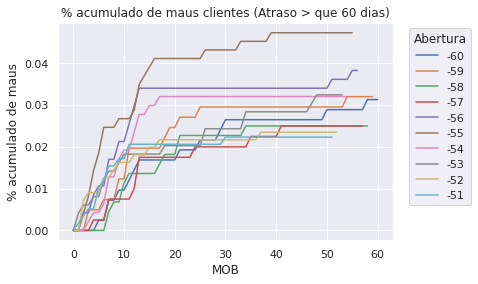

In [91]:
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de maus')
plt.legend(bbox_to_anchor=(1.25, 1), title='Abertura')
plt.show()

Podemos perceber que os gráficos se comportam de maneira semelhante para os diferentes períodos de abertura das contas.

Temos um aumento rápido inicial que perdura até por volta do 12º mês e depois os percentuais de maus pagadores se comportam de maneira mais horizontal, com pequenos degraus em pontos específicos.

Isso indica que temos a definição do comportamento de um cliente (se ele é um mau pagador ou não), geralmente, até o final do primeiro ano.

Vamos verificar agora se temos pelo menos um ano de informações de clientes para saber se poderemos levar nossa análise adiante de forma consistente.

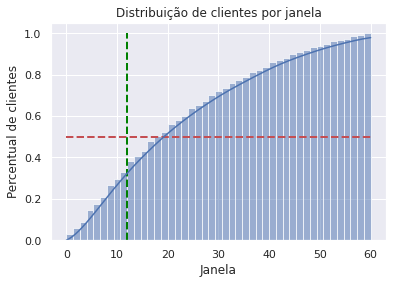

In [98]:
sns.histplot(data=dados_creditos_id, x='Janela', cumulative=True, stat='density', kde=True)
plt.hlines(y=0.5, xmin=0, xmax=60, colors='r', ls='--', lw=2)
plt.vlines(x=12, ymin=0, ymax=1, colors='green', ls='--', lw=2)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

Como podemos ver, a curva acumulada de clientes corta os 50% (linha vermelha) próximo à janela de 20 meses, ou seja, temos mais de 50% de clientes com mais de 12 meses de informação.

Para referência, a linha verde marca os 12 meses, onde temos menos de 40% dos clientes acumulados.

Vamos agora converter a nossa coluna de indicativo de faixa de atraso do pagamento para diversas colunas, que possam ser tratadas de forma binária (0 e 1) como indicativo dos maus pagadores.

In [100]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

In [101]:
for chave, valor in dict_intervalo_atraso.items():
  dados_aprovados[f'Mau_{chave}'] = dados_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
dados_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


Vamos repetir o que fizemos antes, de calcular a taxa de maus pagadores, com algumas alterações.

Antes calculamos para cada combinação de **`Abertura`** e **`MOB`**, agora vamos fazer isso somente considerando o **`MOB`**. E, em vez de calcular somente para aqueles com mais de 60 dias de atraso, vamos usar a estrutura que acabamos de montar para calcular as taxas para mais de 30, 60, 90, 120 e 150 dias de atraso.

Desta vez os comentários de cada passo estão diretamente no código, para facilitar o entendimento.

In [128]:
dados_aprovados.query(f'Mau_maior_150_dias == 1').groupby('ID_Cliente')['MOB'].min().reset_index()

,ID_Cliente,MOB
0,5003804,12
1,5004559,7
2,5004891,9
3,5005205,58
4,5008827,14
...,...,...
190,5149190,2
191,5149192,2
192,5149828,9
193,5149834,12


In [126]:
dict_taxa_mau = {} # Inicializa o dicionário
id_sum = len(set(dados_aprovados['ID_Cliente'])) # Armazena o total de clientes únicos da base de empréstimos

for chave in dict_intervalo_atraso.keys(): # Executa para cada uma das colunas de tempos de atraso
  # Seleciona os clientes da faixa de atraso e o MOB em que entraram nessa faixa  
  df_min_mau = dados_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  # Inicializa o dataframe que vai armazenar as taxas dessa coluna
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = [] # Inicializa a lista que vai armazenar os clientes para cada MOB
  for i in range(0,61): # Executa a varredura para cada MOB
      # Armazena a lista de clientes maus pagadores do MOB corrente
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) # Acrescenta na lista para acumular os maus pagadores
      # Calcula a taxa de maus pagadores dividindo a quantidade de maus pagadores únicos pelo total de clientes da base
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  # Joga o resultado dessa coluna de tempo de atraso para o dicionário que armazena todos os resultados
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

# Converte o dicionário final em dataframe
df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


Vamos plotar os resultados obtidos para facilitar a visualização.

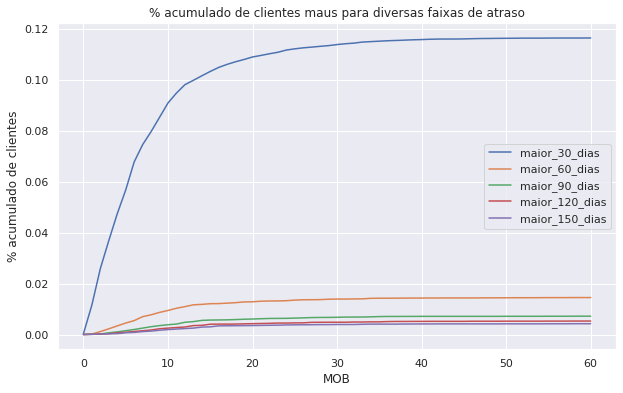

In [104]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

Podemos ver que, se considerarmos os atrasos entre 30 e 59 dias como critério para definir um mau pagador, teremos um impacto mais significativo em nossa base de dados, ultrapassando os 10%.

Vamos eliminar essa faixa do gráfico para que a escala nos permita olhar as curvas para os demais períodos de atraso.

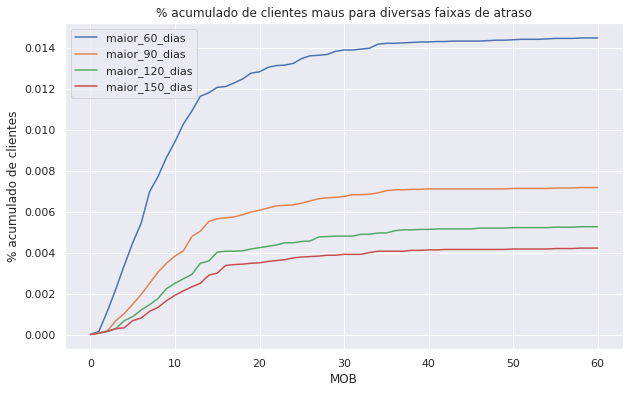

In [105]:
df_taxa_mau.drop('maior_30_dias', axis=1).plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

Agora podemos ver que temos uma inadimplência relativamente baixa (inferior a 1,5%) se considerarmos os atrasos superiores a 60 dias.

### **Vídeo 4 - Definindo o** ***Target***

Como vimos, há uma tendência a estabilizar a situação dos clientes maus pagadores a partir do 12º mês. Vamos verificar se iremos perder muita informação se desprezarmos os clientes que não tiverem pelo menos 12 meses de informação.

In [136]:
meses_corte = 12
print('Total de Clientes            :',len(dados_aprovados.groupby('ID_Cliente').count().index))
print(f'Clientes com {meses_corte} meses ou mais:',
      len(dados_aprovados.query('Janela >= @meses_corte').groupby('ID_Cliente').count().index),'(',
      len(dados_aprovados.query('Janela >= @meses_corte').groupby('ID_Cliente').count().index) / len(dados_aprovados.groupby('ID_Cliente').count().index) *100,
      '%)')

Total de Clientes            : 45985
Clientes com 12 meses ou mais: 30918 ( 67.23496792432316 %)


Vamos permanecer com 67% dos nossos dados.

Pode ser suficiente, vamos começar separando esses clientes em um novo *dataset*, para poder retornar caso seja necessário.

In [137]:
dados_aprov_tratamento1 = dados_aprovados.query('Janela >= @meses_corte').copy()
dados_aprov_tratamento1.shape

(943061, 14)

Agora podemos criar nossa variável *target*, ou seja, vamos criar um *dataframe* com todos os nossos clientes e a informação de quais são classificados como **maus pagadores**.

In [140]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0

In [139]:
# Fiz uma função alternativa que achei que seria mais rápida por não
# fazer a conferência de diversos strings
# Mas essa função se mostrou bem mais lenta... não entendi
# Mas deu o mesmo resultado

def verifica_2(registros):
    pior_status = registros['Ind_Faixa_atraso'].max()
    if pior_status >= 4:
        return 1
    else:
        return 0

In [145]:
dados_creditos_id = pd.DataFrame(dados_aprov_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
dados_creditos_id.columns = ['ID_Cliente', 'Mau']
dados_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [147]:
print(dados_creditos_id.Mau.sum(),'Maus Pagadores')

585 Maus Pagadores


Dentro de nossa base, temos então 585 clientes considerados mau pagadores.

Vamos ver como isso se comporta em relação aos totais de clientes cadastrados e clientes com empréstimos que temos em nossas bases tratadas.

In [149]:
print(dados_creditos_id.shape[0],'Clientes com Crédito')

30918 Clientes com Crédito


In [150]:
print(dados_cad_tratamento1.shape[0],'Clientes Cadastrados')

425822 Clientes Cadastrados


In [152]:
print('Os',dados_creditos_id.Mau.sum(),'Maus Pagadores representam:')
print('- ',dados_creditos_id.Mau.sum() / dados_creditos_id.shape[0] * 100,'% dos Clientes com Crédito')
print('- ',dados_creditos_id.Mau.sum() / dados_cad_tratamento1.shape[0] * 100,'% dos Clientes Cadastrados')

Os 585 Maus Pagadores representam:
-  1.892101688336891 % dos Clientes com Crédito
-  0.1373813471356576 % dos Clientes Cadastrados


Como podemos ver, temos percentuais bem baixos de inadimplência em nossa base.

Isso poderá nos dificultar futuramente no treinamento de modelos de *machine learning*.

Agora podemos juntar as informações que temos dos nossos clientes com crédito dentro da base de clientes cadastrados.

In [153]:
df_registro_clientes_targets = dados_cad_tratamento1.merge(dados_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,"112,500.000000",Empregado,Ensino medio,Casado,Casa propria,59.000000,0,0,0,Seguranca,2.000000,3.100000,0
1,5008810,0,1,0,"270,000.000000",Associado comercial,Ensino medio,Solteiro,Casa propria,52.000000,0,1,1,Venda,1.000000,8.400000,0
2,5008811,0,1,0,"270,000.000000",Associado comercial,Ensino medio,Solteiro,Casa propria,52.000000,0,1,1,Venda,1.000000,8.400000,0
3,5008812,0,1,0,"283,500.000000",Pensionista,Ensino superior,Separado,Casa propria,62.000000,0,0,0,Outros,1.000000,-1.000000,0
4,5008813,0,1,0,"283,500.000000",Pensionista,Ensino superior,Separado,Casa propria,62.000000,0,0,0,Outros,1.000000,-1.000000,0


In [158]:
print(df_registro_clientes_targets.shape)
print(df_registro_clientes_targets['Mau'].value_counts())

(22742, 17)
0    22225
1      517
Name: Mau, dtype: int64


In [154]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100

0   97.726673
1    2.273327
Name: Mau, dtype: float64

Alguns pontos que chamam a atenção nessa consolidação das bases:
* Apesar de termos 425 mil clientes cadastrados e quase 31 mil clientes com informações de crédito, só conseguimos consolidar as informações de menos de 23 mil clientes
* Nossa base é muito desbalanceada, com pouco mais de 2% dos clientes em situação de mau pagador

É estranho termos 8 mil clientes com informações de crédito mas que não estão em nossa base cadastral. Possivelmente foram eliminados no tratamento da base, quando eliminamos aqueles registros duplicados e os *outliers* de rendimento anual. Vamos verificar isso:

In [163]:
print('Clientes Desprezados (outliers):',df_renda_outliers.shape[0])
print('Info de Crédito de Outliers    :  ',df_renda_outliers.merge(dados_creditos_id, on='ID_Cliente').shape[0])

Clientes Desprezados (outliers): 12641
Info de Crédito de Outliers    :   677


Conseguimos encontrar apenas 677 clientes dos 8 mil que perdemos na consolidação (30918 - 22742 = 8176).

Isso é mais um indicativo de que podemos ter tido algum problema na geração inicial dos dados a serem utilizados para esse estudo (além dos registros duplicados que encontramos inicialmente).

#### **Desafio 6 - Criar Uma Tabela com a Quantidade Clientes Relativo a Base por Faixas Atraso**
---


A maneira mais simples de fazer isso é reaproveitando o código que usamos para calcular a taxa de maus pagadores mas não fazer a divisão pelo total de clientes.

Para saber os totais, pegaremos a última linha (60) do *dataframe* resultante.

In [168]:
dict_qtd_mau = {} 

for chave in dict_intervalo_atraso.keys():
  df_min_mau = dados_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_qtd_mau = pd.DataFrame({'MOB':range(0,61), 'Qtd_Mau': np.nan})
  lst = [] 
  for i in range(0,61): 
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) 
      df_mob_qtd_mau.loc[df_mob_qtd_mau['MOB'] == i, 'Qtd_Mau'] = len(set(lst))
  dict_qtd_mau[chave] = df_mob_qtd_mau['Qtd_Mau']

df_qtd_mau = pd.DataFrame(dict_qtd_mau)
df_qtd_mau.loc[60]

maior_30_dias    5,350.000000
maior_60_dias      667.000000
maior_90_dias      331.000000
maior_120_dias     243.000000
maior_150_dias     195.000000
Name: 60, dtype: float64

#### **Desafio 7 - Pesquisar Técnicas para Resolver** ***Target***
---

Encontrar maneiras de resolver quando temos uma base de treino desbalanceada como é o caso dessa.

Pesquisei e encontrei diversos artigos a respeito. Destaco o que achei mais interessante:

* **Over Sampling:** aumentamos as amostras da classe que estiver com menor representação em nossa base, replicando dados de forma aleatória
* **SMOTE (Synthetic Minority Over-sampling Technique):** gera novos dados (não duplicados) da classe minoritária a partir de vizinhos. Se forem geradas muitas amostras, pode levar ao *overfitting*
* **Under Sampling:** reduzimos de forma aleatória as amostras da classe que estiver com maior representação em nossa base
* **Near Miss:** reduzimos a classe majoritária com base na distância entre os dados

&nbsp;

**REFERÊNCIAS:**
* [Como lidar com dados desbalanceados?](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/)
* [Lidando com Classes Desbalanceadas – Machine Learning](https://minerandodados.com.br/lidando-com-classes-desbalanceadas-machine-learning/)
* [Como lidar com dados desbalanceados em problemas de classificação](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9)